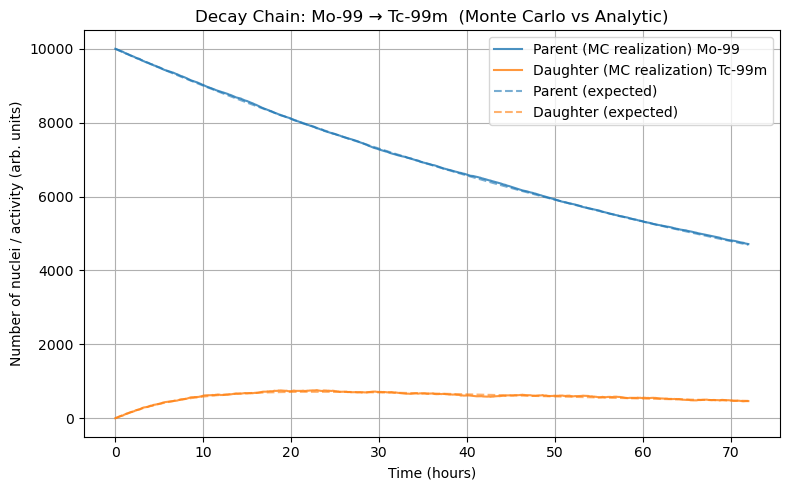

In [2]:
# Monte Carlo decay chain: Mo-99 -> Tc-99m -> stable
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETERS ---
N0 = 10000                      # initial parent nuclei (Mo-99)
half_parent = 66.0              # Mo-99 half-life in hours
half_daughter = 6.01            # Tc-99m half-life in hours

lam_p = np.log(2) / half_parent
lam_d = np.log(2) / half_daughter

t_max = 72.0                    # simulate up to 72 hours
dt = 0.1                        # timestep in hours
time = np.arange(0, t_max + dt, dt)

# --- Monte Carlo simulation (one realization) ---
Np = np.zeros_like(time)   # parent counts
Nd = np.zeros_like(time)   # daughter counts
Ns = np.zeros_like(time)   # stable product counts (optional)

Np[0] = N0
Nd[0] = 0
Ns[0] = 0

rng = np.random.default_rng()

for i in range(1, len(time)):
    prev_p = int(Np[i-1])
    prev_d = int(Nd[i-1])

    # Probabilities of decay in dt (exact Poisson survive -> binomial decays)
    p_dec_p = 1 - np.exp(-lam_p * dt)
    p_dec_d = 1 - np.exp(-lam_d * dt)

    # number of parent decays -> become daughters
    dec_p = rng.binomial(prev_p, p_dec_p) if prev_p > 0 else 0
    # number of daughter decays -> become stable (or ground state)
    dec_d = rng.binomial(prev_d, p_dec_d) if prev_d > 0 else 0

    Np[i] = prev_p - dec_p
    # daughters: previous daughters + new from parent - those that decayed
    Nd[i] = prev_d + dec_p - dec_d
    Ns[i] = Ns[i-1] + dec_d

# --- Deterministic / analytic expectation (Bateman for two-member chain) ---
# Parent expected: Np_exp(t) = N0 * exp(-lam_p * t)
Np_exp = N0 * np.exp(-lam_p * time)

# Daughter expected (Bateman): Nd_exp(t) = N0 * (lam_p/(lam_d - lam_p)) * (exp(-lam_p t) - exp(-lam_d t))
# handle case lam_d == lam_p (not here)
Nd_exp = N0 * (lam_p/(lam_d - lam_p)) * (np.exp(-lam_p * time) - np.exp(-lam_d * time))

# --- PLOTTING ---
plt.figure(figsize=(8,5))
plt.plot(time, Np, label='Parent (MC realization) Mo-99', color='C0', alpha=0.8)
plt.plot(time, Nd, label='Daughter (MC realization) Tc-99m', color='C1', alpha=0.8)
plt.plot(time, Np_exp, '--', label='Parent (expected)', color='C0', alpha=0.6)
plt.plot(time, Nd_exp, '--', label='Daughter (expected)', color='C1', alpha=0.6)
plt.xlabel('Time (hours)')
plt.ylabel('Number of nuclei / activity (arb. units)')
plt.title('Decay Chain: Mo-99 → Tc-99m  (Monte Carlo vs Analytic)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save figure
plt.savefig('Mo99_Tc99m_decay_chain.png', dpi=300)
plt.show()